In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
color_pal = sns.color_palette()
import xgboost as xgb
from pyspark.sql.types import *

In [25]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [26]:
customSchema = StructType([
    StructField("index", StringType(), True), 
    StructField("id", StringType(), True), 
    StructField("date", IntegerType(), True), 
    StructField("flag", IntegerType(), True),
    StructField("user", IntegerType(), True),
    StructField("text", IntegerType(), True)])

df = spark.read.load('hdfs://localhost:9000/sharesprk1/ProjectTweets.csv', format="csv", header="true", schema=customSchema)
df = df.drop(df.columns[0])
df.printSchema()


root
 |-- id: string (nullable = true)
 |-- date: integer (nullable = true)
 |-- flag: integer (nullable = true)
 |-- user: integer (nullable = true)
 |-- text: integer (nullable = true)



In [28]:
df.head(5)

[Row(id='1467810672', date=None, flag=None, user=None, text=None),
 Row(id='1467810917', date=None, flag=None, user=None, text=None),
 Row(id='1467811184', date=None, flag=None, user=None, text=None),
 Row(id='1467811193', date=None, flag=None, user=None, text=None),
 Row(id='1467811372', date=None, flag=None, user=None, text=None)]

In [7]:
# df = df.set_index('date')
# Investigate the need for setting an index when using spark?????
# possible way to achieve below:
# -----------------------------
# df = df.withColumn('date', monotonically_increasing_id())
pandas_df = df.toPandas()
pandas_df = pandas_df.set_index('date')

AttributeError: 'DataFrame' object has no attribute 'set_index'

In [22]:
pandas_df = df.toPandas()

In [ ]:
pd.to_datetime(pandas_df.index)

<Axes: xlabel='date'>

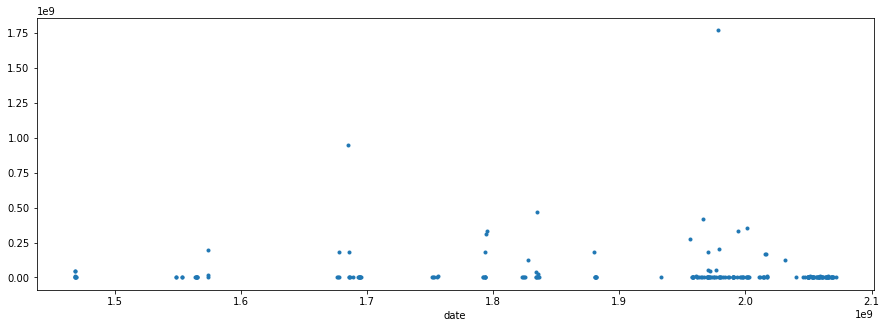

In [16]:
#pandas_df.plot(style='.', figsize=(15, 5), color=color_pal[0])
pandas_df.set_index('date')['text'].plot(style='.', figsize=(15, 5), color=color_pal[0])